# ECE - GY 6123
# Introduction to Machine Learning
# Term Project | Fall 2020
# Hand Gesture Classifier using CNN and Transfer Learning

**Mounting Google Drive where entire data and codes are created, stored and edited**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing required libraries and APIs**

In [ ]:
#Importing
import numpy as np
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten,BatchNormalization,MaxPool2D
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.preprocessing import image

**Loading training and validation data from the designated folders in the Google Drive using Keras functions**

In [ ]:
#Getting Data
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/ML NYU Fall 2020/Machine Learning Term Project/Final Folder/Training_Data_Resized", labels='inferred', label_mode="categorical",class_names=['fantastic','hi-five','strength','thumbs-down','thumbs-up','victory','yolo'],
    color_mode="grayscale", batch_size=32, image_size=(28, 28), shuffle=True, seed=123,
    validation_split=0.15, subset="training"
)
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/ML NYU Fall 2020/Machine Learning Term Project/Final Folder/Training_Data_Resized", labels='inferred', label_mode="categorical", class_names=['fantastic','hi-five','strength','thumbs-down','thumbs-up','victory','yolo'],
    color_mode="grayscale", batch_size=32, image_size=(28, 28), shuffle=True, seed=123,
    validation_split=0.15, subset="validation"
)

Found 1402 files belonging to 7 classes.
Using 1192 files for training.
Found 1402 files belonging to 7 classes.
Using 210 files for validation.


**Visualizing 9 random images from train data after pre-processing**

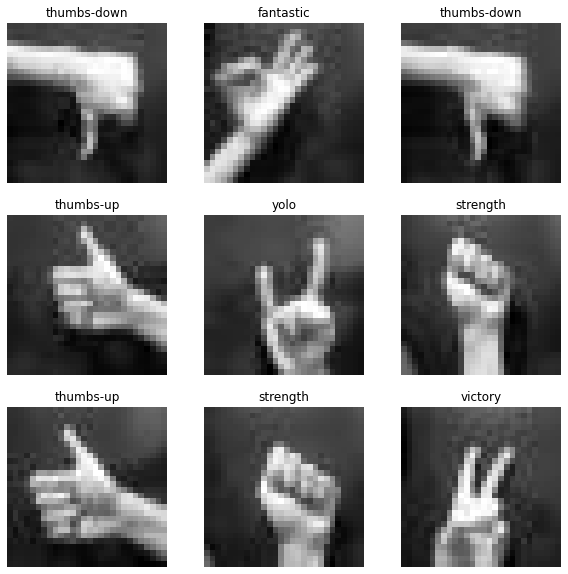

In [ ]:
#Visiualizing Data
class_names = ['fantastic','hi-five','strength','thumbs-down','thumbs-up','victory','yolo']
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    tbp = image.img_to_array(images[i])
    plt.imshow(tf.squeeze(tbp), cmap = 'gray')
    plt.title(class_names[np.argmax(labels[i],axis=0)])
    plt.axis("off")

# Model from Scratch

**Creating model from the scratch**

In [ ]:
#Creating model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape=(28,28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(16, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(7, activation = 'softmax'))

In [ ]:
#Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               51328     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

**Creating callbacks; one for tracking time and the other for tracking accuracy [1]**

In [ ]:
from timeit import default_timer as timer

class TimingCallback(keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

cb = TimingCallback()

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy')>0.998):
                print("\nReached 99.8% accuracy so cancelling training!")
                self.model.stop_training = True


acc_callbacks = myCallback()

**Compiling and training**

In [ ]:
#Training model
keras.backend.clear_session()
model.compile(optimizer='Adam', metrics=['accuracy'], loss='categorical_crossentropy')
fit = model.fit(train_data,validation_data=val_data,epochs=25, callbacks=[cb, acc_callbacks])

Epoch 1/25
38/38 [==============================] - 3s 76ms/step - loss: 6.9843 - accuracy: 0.3070 - val_loss: 1.3435 - val_accuracy: 0.5190
Epoch 2/25
38/38 [==============================] - 3s 77ms/step - loss: 0.9344 - accuracy: 0.6628 - val_loss: 0.5499 - val_accuracy: 0.8048
Epoch 3/25
38/38 [==============================] - 3s 78ms/step - loss: 0.4246 - accuracy: 0.8540 - val_loss: 0.1666 - val_accuracy: 0.9619
Epoch 4/25
38/38 [==============================] - 3s 76ms/step - loss: 0.1992 - accuracy: 0.9295 - val_loss: 0.0674 - val_accuracy: 0.9810
Epoch 5/25
38/38 [==============================] - 3s 70ms/step - loss: 0.0723 - accuracy: 0.9790 - val_loss: 0.0165 - val_accuracy: 1.0000
Epoch 6/25
38/38 [==============================] - 3s 67ms/step - loss: 0.0515 - accuracy: 0.9824 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 7/25
38/38 [==============================] - 3s 68ms/step - loss: 0.0293 - accuracy: 0.9908 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 8/25
38

**Printing time and plotting accuracy graphs**

In [ ]:
print(cb.logs)
print(sum(cb.logs))

[3.8499311109999326, 3.4155097029997705, 3.5635947370001304, 3.4466483050000534, 3.152695532999587, 3.0459625500002403, 3.072302319999835, 2.978807604999929, 3.1337172190001183, 3.144875528999819, 3.1084275769999294, 3.1623346960000163, 3.070247517000098, 3.157531038000343, 3.1343532389996653]
48.43693867899947


In [ ]:
#Data for plots
acc = fit.history['accuracy']
val_acc = fit.history['val_accuracy']
loss = fit.history['loss']
val_loss = fit.history['val_loss']
epochs = range(1, len(loss) + 1)

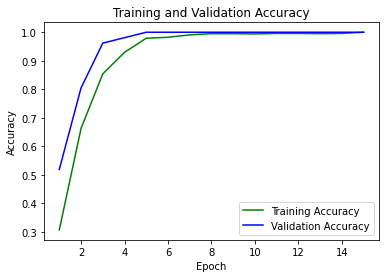

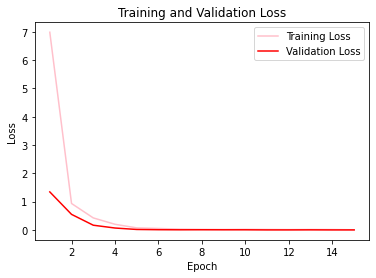

<Figure size 432x288 with 0 Axes>

In [ ]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.figure()
plt.show()

In [ ]:
#Saving model
model.save('/content/drive/MyDrive/ML NYU Fall 2020/Machine Learning Term Project/Final Folder/SignLanguageModelScratch.h5')

**Testing the model on an unseen image**

> Indented block



(28, 28, 1)
fantastic => 0.76%
hi-five => 3.57%
strength => 7.44%
thumbs-down => 0.59%
thumbs-up => 16.51%
victory => 70.94%
yolo => 0.19%


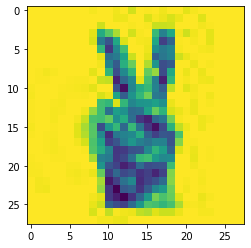

In [ ]:
#Predicting images
def Predict_image(dir,model):
    img = image.load_img(dir,color_mode='grayscale',target_size=(28,28,1))
    ar = image.img_to_array(img)
    print(ar.shape)
    plt.imshow(tf.squeeze(ar))
    ar = np.expand_dims(ar,axis=0)
    pred = model.predict(ar)
    pred = pred.flatten()
    for i in range(0,len(class_names)):
        print("{} => {:.2f}%".format(class_names[i],pred[i]*100))

Predict_image('/content/drive/MyDrive/ML NYU Fall 2020/Machine Learning Term Project/Final Folder/Test_Set_Resized/images302_resized.jpg',model)

25
/content/drive/MyDrive/ML NYU Fall 2020/Machine Learning Term Project/Final Folder/Test_Set_Resized/34369987-man-hand-indicating-peace-victory-sign-the-v-sign-is-a-hand-gesture-in-which-the-index-and-middle-fi_resized.jpg
/content/drive/MyDrive/ML NYU Fall 2020/Machine Learning Term Project/Final Folder/Test_Set_Resized/6ip5qj7pT (1)_resized.jpg
/content/drive/MyDrive/ML NYU Fall 2020/Machine Learning Term Project/Final Folder/Test_Set_Resized/WIN_20201206_20_58_34_Pro_resized.jpg
/content/drive/MyDrive/ML NYU Fall 2020/Machine Learning Term Project/Final Folder/Test_Set_Resized/WIN_20201206_21_05_45_Pro_resized.jpg
/content/drive/MyDrive/ML NYU Fall 2020/Machine Learning Term Project/Final Folder/Test_Set_Resized/WIN_20201206_21_05_34_Pro_resized.jpg
/content/drive/MyDrive/ML NYU Fall 2020/Machine Learning Term Project/Final Folder/Test_Set_Resized/WIN_20201206_20_58_23_Pro_resized.jpg
/content/drive/MyDrive/ML NYU Fall 2020/Machine Learning Term Project/Final Folder/Test_Set_Resiz

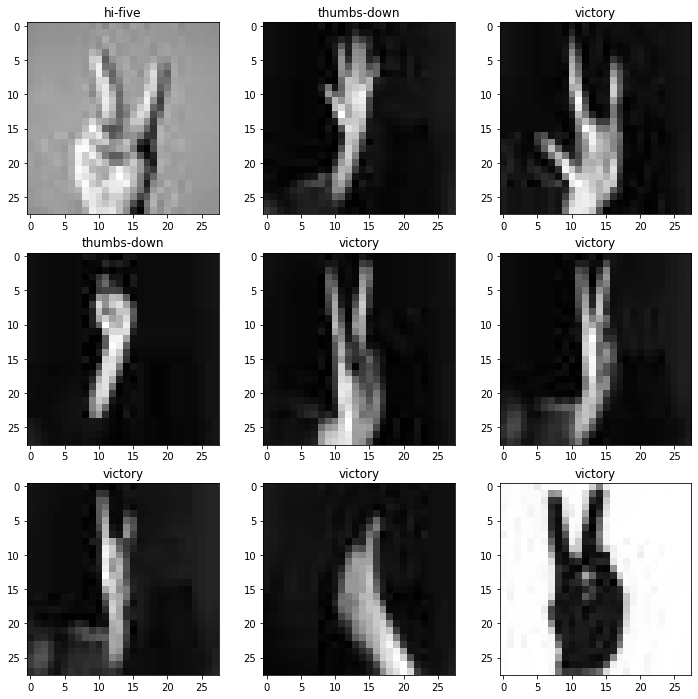

In [ ]:
import random, os
def Predict_Images(dir,model):
    plt.figure(figsize=(12, 12))
    class_names = ['fantastic','hi-five','strength','thumbs-down','thumbs-up','victory','yolo']
    count = 0
    for root, dirs, files in os.walk(dir, topdown=False):
        print(int(np.sqrt(len(files)))*int(np.sqrt(len(files))))
        for name in files:
            print(os.path.join(root, name))
            if(np.random.rand()>0.5):
                ax = plt.subplot(3, 3, count+1)
                img = image.load_img(os.path.join(root, name),color_mode='grayscale',target_size=(28,28,1))
                ar = image.img_to_array(img)
                plt.imshow(tf.squeeze(ar), cmap = 'gray')
                ar = np.expand_dims(ar,axis=0)
                pred = np.argmax(model.predict(ar),axis=1)
                plt.title(class_names[pred[0]])
                count = count + 1
            if(count == 9):
                break

Predict_Images("/content/drive/MyDrive/ML NYU Fall 2020/Machine Learning Term Project/Final Folder/Test_Set_Resized",model)

**Following three cells are used to plot the output of intermediate convolution layers [2]**

In [ ]:
# Directory with our training horse pictures
fantastic_dir = os.path.join('/content/drive/MyDrive/ML NYU Fall 2020/Machine Learning Term Project/Final Folder/Training_Data_Resized/fantastic')
hi5_dir = os.path.join('/content/drive/MyDrive/ML NYU Fall 2020/Machine Learning Term Project/Final Folder/Training_Data_Resized/hi-five')
strength_dir = os.path.join('/content/drive/MyDrive/ML NYU Fall 2020/Machine Learning Term Project/Final Folder/Training_Data_Resized/strength')
thumbs_down_dir = os.path.join('/content/drive/MyDrive/ML NYU Fall 2020/Machine Learning Term Project/Final Folder/Training_Data_Resized/thumbs-down')
thumbs_up_dir = os.path.join('/content/drive/MyDrive/ML NYU Fall 2020/Machine Learning Term Project/Final Folder/Training_Data_Resized/thumbs-up')
victory_dir = os.path.join('/content/drive/MyDrive/ML NYU Fall 2020/Machine Learning Term Project/Final Folder/Training_Data_Resized/victory')
yolo_dir = os.path.join('/content/drive/MyDrive/ML NYU Fall 2020/Machine Learning Term Project/Final Folder/Training_Data_Resized/yolo')


fantastic_names = os.listdir(fantastic_dir)
hi5_names = os.listdir(hi5_dir)
strength_names = os.listdir(strength_dir)
thumbs_down_names = os.listdir(thumbs_down_dir)
thumbs_up_names = os.listdir(thumbs_up_dir)
victory_names = os.listdir(victory_dir)
yolo_names = os.listdir(yolo_dir)


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
fantastic_img_files = [os.path.join(fantastic_dir, f) for f in fantastic_names]
hi5_img_files = [os.path.join(hi5_dir, f) for f in hi5_names]
strength_img_files = [os.path.join(strength_dir, f) for f in strength_names]
thumbs_down_img_files = [os.path.join(thumbs_down_dir, f) for f in thumbs_down_names]
thumbs_up_img_files = [os.path.join(thumbs_up_dir, f) for f in thumbs_up_names]
victory_img_files = [os.path.join(victory_dir, f) for f in victory_names]
yolo_img_files = [os.path.join(yolo_dir, f) for f in yolo_names]
img_path = random.choice(fantastic_img_files + hi5_img_files + strength_img_files + thumbs_down_img_files + thumbs_up_img_files + victory_img_files + yolo_img_files)

img = load_img(img_path, color_mode='grayscale',target_size=(28,28,1))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)

x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 1)

# Rescale by 1/255
#x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]


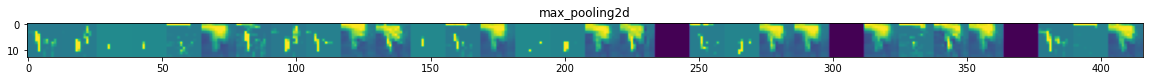

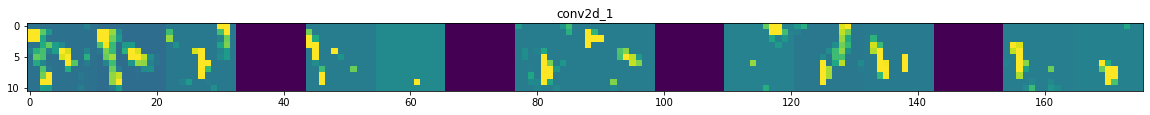

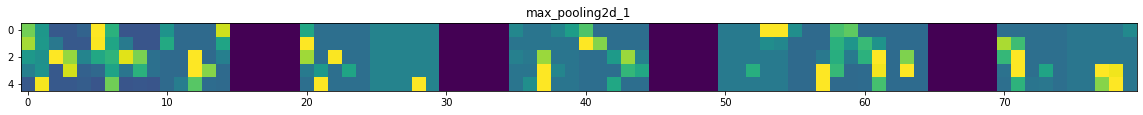

In [ ]:
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Model using Transfer Learning

**Loading fashion MNIST model saved in the directory [3]**

In [ ]:
from keras.models import load_model
#Loading MNIST model as base
model = load_model('/content/drive/MyDrive/ML NYU Fall 2020/Machine Learning Term Project/Final Folder/mnistModel')
model.layers[0].trainable = False
model.layers[1].trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1384576   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,385,866
Non-trainable params: 640
_________________________________________________________________


**Importing layers from fashion MNIST model and adding a few custom layers**

In [ ]:
#Creating new model
TL_Model = Sequential()
TL_Model.add(model.layers[0])
TL_Model.add(model.layers[1])
TL_Model.add(Conv2D(16, kernel_size = (3, 3), activation = 'relu',name='c2'))
TL_Model.add(MaxPooling2D(pool_size = (2, 2),name ='m2'))
TL_Model.add(Flatten())
TL_Model.add(Dense(64,activation = 'relu'))
TL_Model.add(Dropout(0.20))
TL_Model.add(Dense(7,activation='softmax'))

In [ ]:
TL_Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
c2 (Conv2D)                  (None, 11, 11, 16)        9232      
_________________________________________________________________
m2 (MaxPooling2D)            (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                25664     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

In [ ]:
class TimingCallback(keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

cb1 = TimingCallback()

**Compiling and training**

In [ ]:
#Training the model
keras.backend.clear_session()
TL_Model.compile(optimizer='Adam', metrics=['accuracy'], loss='categorical_crossentropy')
fit = TL_Model.fit(train_data,validation_data=val_data,epochs=25, callbacks=[cb1, acc_callbacks])

Epoch 1/25
38/38 [==============================] - 3s 67ms/step - loss: 2.3392 - accuracy: 0.5445 - val_loss: 0.4028 - val_accuracy: 0.8762
Epoch 2/25
38/38 [==============================] - 2s 63ms/step - loss: 0.2778 - accuracy: 0.9111 - val_loss: 0.0479 - val_accuracy: 0.9952
Epoch 3/25
38/38 [==============================] - 2s 63ms/step - loss: 0.0965 - accuracy: 0.9723 - val_loss: 0.0220 - val_accuracy: 0.9905
Epoch 4/25
38/38 [==============================] - 2s 64ms/step - loss: 0.0600 - accuracy: 0.9799 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 5/25
38/38 [==============================] - 2s 62ms/step - loss: 0.0381 - accuracy: 0.9866 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 6/25
36/38 [===========================>..] - ETA: 0s - loss: 0.0145 - accuracy: 0.9983
Reached 99.8% accuracy so cancelling training!
38/38 [==============================] - 2s 62ms/step - loss: 0.0145 - accuracy: 0.9983 - val_loss: 0.0016 - val_accuracy: 1.0000


**Printing time and plotting accuracy curves**

In [ ]:
print(cb1.logs)
print(sum(cb1.logs))

[3.337741518999792, 2.804591089000496, 2.8189245540006596, 2.861063084000307, 2.804527588000383, 2.7703599050000776]
17.397207739001715


In [ ]:
#Data for plots
acc = fit.history['accuracy']
val_acc = fit.history['val_accuracy']
loss = fit.history['loss']
val_loss = fit.history['val_loss']
epochs = range(1, len(loss) + 1)

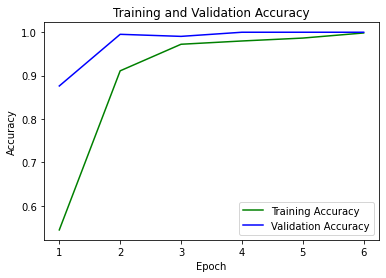

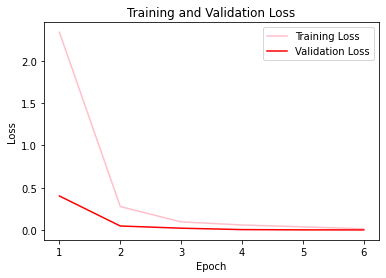

<Figure size 432x288 with 0 Axes>

In [ ]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.figure()
plt.show()

**Performance of transfer learning-based model on unseen images**

(28, 28, 1)
fantastic => 0.00%
hi-five => 0.00%
strength => 0.15%
thumbs-down => 0.00%
thumbs-up => 0.00%
victory => 89.23%
yolo => 10.62%


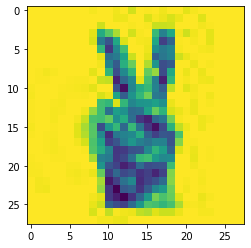

In [ ]:
Predict_image('/content/drive/MyDrive/ML NYU Fall 2020/Machine Learning Term Project/Final Folder/Test_Set_Resized/images302_resized.jpg',TL_Model)

25
/content/drive/MyDrive/ML NYU Fall 2020/Machine Learning Term Project/Final Folder/Test_Set_Resized/34369987-man-hand-indicating-peace-victory-sign-the-v-sign-is-a-hand-gesture-in-which-the-index-and-middle-fi_resized.jpg
/content/drive/MyDrive/ML NYU Fall 2020/Machine Learning Term Project/Final Folder/Test_Set_Resized/6ip5qj7pT (1)_resized.jpg
/content/drive/MyDrive/ML NYU Fall 2020/Machine Learning Term Project/Final Folder/Test_Set_Resized/WIN_20201206_20_58_34_Pro_resized.jpg
/content/drive/MyDrive/ML NYU Fall 2020/Machine Learning Term Project/Final Folder/Test_Set_Resized/WIN_20201206_21_05_45_Pro_resized.jpg
/content/drive/MyDrive/ML NYU Fall 2020/Machine Learning Term Project/Final Folder/Test_Set_Resized/WIN_20201206_21_05_34_Pro_resized.jpg
/content/drive/MyDrive/ML NYU Fall 2020/Machine Learning Term Project/Final Folder/Test_Set_Resized/WIN_20201206_20_58_23_Pro_resized.jpg
/content/drive/MyDrive/ML NYU Fall 2020/Machine Learning Term Project/Final Folder/Test_Set_Resiz

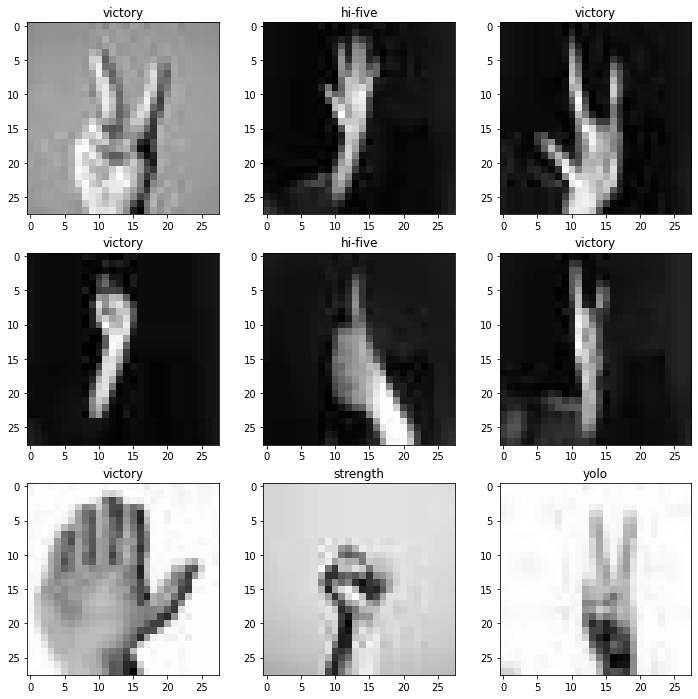

In [ ]:
Predict_Images("/content/drive/MyDrive/ML NYU Fall 2020/Machine Learning Term Project/Final Folder/Test_Set_Resized",TL_Model)

**Displaying output of convolutional layers for transfer learning-based models**

In [ ]:
successive_outputs = [layer.output for layer in TL_Model.layers[2:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = TL_Model.input, outputs = successive_outputs)

img = load_img(img_path, color_mode='grayscale',target_size=(28,28,1))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)

x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 1)
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in TL_Model.layers[1:]]

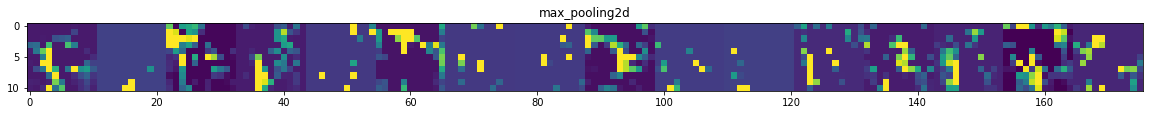

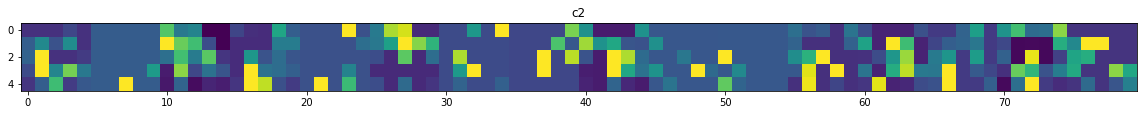

In [ ]:
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

**References**


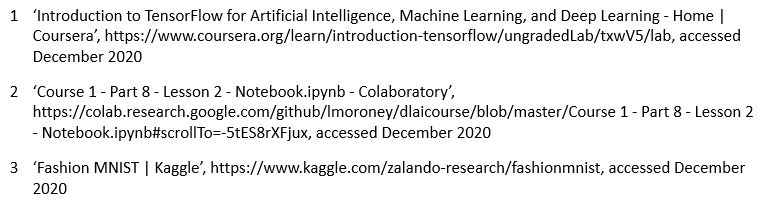